In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from scipy import integrate
from mpl_toolkits.mplot3d import Axes3D

from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, MaxPool2D
from keras import optimizers
from keras.layers import Activation
from keras.utils.generic_utils import get_custom_objects
from keras import backend as K


rcParams.update({'font.size': 18})
plt.rcParams['figure.figsize'] = [12, 12]

Using TensorFlow backend.
/home/jmhu/miniconda/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:526: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/jmhu/miniconda/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:527: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/jmhu/miniconda/envs/tf/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:528: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/jmhu/miniconda/envs/tf/lib/pytho

### Simulate the Lorenz System

#### Initial conditions

In [2]:
dt = 0.01
T = 8
t = np.arange(0,T+dt,dt)
beta = 8/3
sigma = 10
rho = 28

In [3]:
def lorenz_deriv(x_y_z, t0, sigma, beta, rho):
    x, y, z = x_y_z
    return [sigma * (y - x), x * (rho - z) - y, x * y - beta * z]

In [4]:
# Instantiate arrays of zeros for neural network input and output
nn_input = np.zeros((100*(len(t)-1),3))
nn_output = np.zeros_like(nn_input)

In [5]:
np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))
x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t, (sigma, beta, rho))
                  for x0_j in x0])

In [6]:
x0.shape

(100, 3)

In [7]:
x_t.shape

(100, 801, 3)

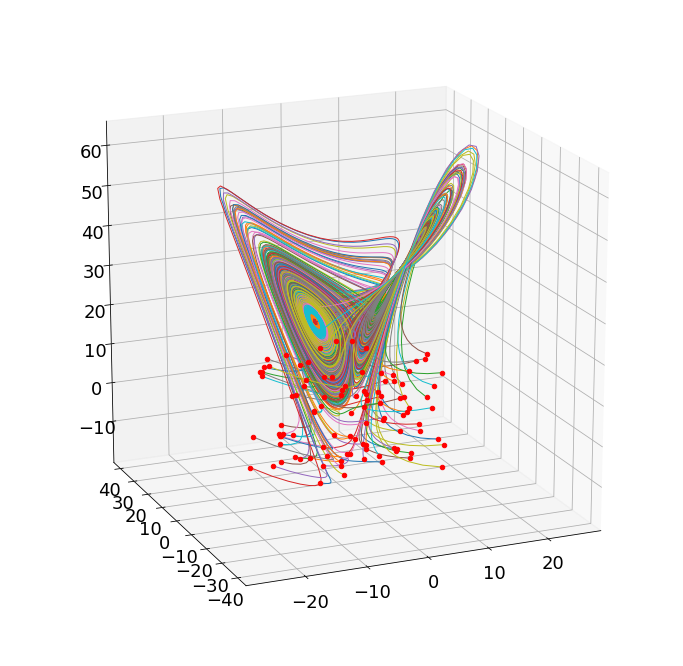

In [8]:
fig, ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})

for j in range(100):
    nn_input[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,:-1,:]
    nn_output[j*(len(t)-1):(j+1)*(len(t)-1),:] = x_t[j,1:,:]
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

### 5-stage lifecycle

#### 1. Define the Model

In [9]:
model = Sequential()

In [10]:
# Add 1 hidden layer with 10 nodes of this tensor shape
n_features = (3,)

model.add(Dense(10, activation='sigmoid', kernel_initializer='random_normal', input_shape=(n_features)))
model.add(Dense(10, activation='relu', input_shape=(n_features)))
model.add(Dense(10, activation='linear', input_shape=(n_features)))
model.add(Dense(3))

Instructions for updating:
Colocations handled automatically by placer.


#### 2. Compile the Model
Select loss function to optimize
  
Select algorithm for optimization  
https://www.tensorflow.org/api_docs/python/tf/keras/optimizers
  
Specify performance metrics for model training  
https://www.tensorflow.org/api_docs/python/tf/keras/metrics

In [11]:
# compile the model
model.compile(optimizer='sgd', loss='mse', metrics=['accuracy'])

#### 3. Fit the Model
Select training configuration
- epochs (loops)
- batch size (samples in each epoch)  
  
[tutorial on choosing batch size](https://machinelearningmastery.com/how-to-control-the-speed-and-stability-of-training-neural-networks-with-gradient-descent-batch-size/)

In [28]:
# fit the model
model.fit(nn_input, nn_output, epochs=120, batch_size=32)

Epoch 1/120
80000/80000 [==============================] - 4s 50us/step - loss: 6.3876 - accuracy: 0.9891
Epoch 2/120
80000/80000 [==============================] - 4s 50us/step - loss: 5.6233 - accuracy: 0.9860
Epoch 3/120
80000/80000 [==============================] - 4s 50us/step - loss: 6.0474 - accuracy: 0.9865
Epoch 4/120
80000/80000 [==============================] - 4s 50us/step - loss: 6.1392 - accuracy: 0.9869
Epoch 5/120
80000/80000 [==============================] - 4s 49us/step - loss: 5.8920 - accuracy: 0.9880
Epoch 6/120
80000/80000 [==============================] - 4s 49us/step - loss: 5.3149 - accuracy: 0.9887
Epoch 7/120
80000/80000 [==============================] - 4s 45us/step - loss: 4.7424 - accuracy: 0.9891
Epoch 8/120
80000/80000 [==============================] - 4s 50us/step - loss: 4.8267 - accuracy: 0.9892
Epoch 9/120
80000/80000 [==============================] - 4s 50us/step - loss: 4.7445 - accuracy: 0.9898
Epoch 10/120
80000/80000 [====================

80000/80000 [==============================] - 4s 50us/step - loss: 5.8811 - accuracy: 0.9892
Epoch 78/120
80000/80000 [==============================] - 4s 49us/step - loss: 5.8945 - accuracy: 0.9894
Epoch 79/120
80000/80000 [==============================] - 4s 49us/step - loss: 6.7505 - accuracy: 0.9898
Epoch 80/120
80000/80000 [==============================] - 4s 49us/step - loss: 5.3141 - accuracy: 0.9901
Epoch 81/120
80000/80000 [==============================] - 4s 50us/step - loss: 5.4088 - accuracy: 0.9906
Epoch 82/120
80000/80000 [==============================] - 4s 49us/step - loss: 5.2632 - accuracy: 0.9904
Epoch 83/120
80000/80000 [==============================] - 4s 51us/step - loss: 5.1739 - accuracy: 0.9907
Epoch 84/120
80000/80000 [==============================] - 4s 49us/step - loss: 5.6092 - accuracy: 0.9906
Epoch 85/120
80000/80000 [==============================] - 4s 50us/step - loss: 4.6073 - accuracy: 0.9906
Epoch 86/120
80000/80000 [========================

#### 4. Evaluate the Model

In [29]:
# evaluate the model
loss, acc = model.evaluate(nn_input, nn_output, verbose=0)

In [30]:
loss, acc

(13.53667831068039, 0.9858375191688538)

#### 5. Make a Prediction

In [31]:
# make a prediction
yhat = model.predict(nn_input)

In [32]:
yhat.shape

(80000, 3)

##### Visualize it

<IPython.core.display.Javascript object>


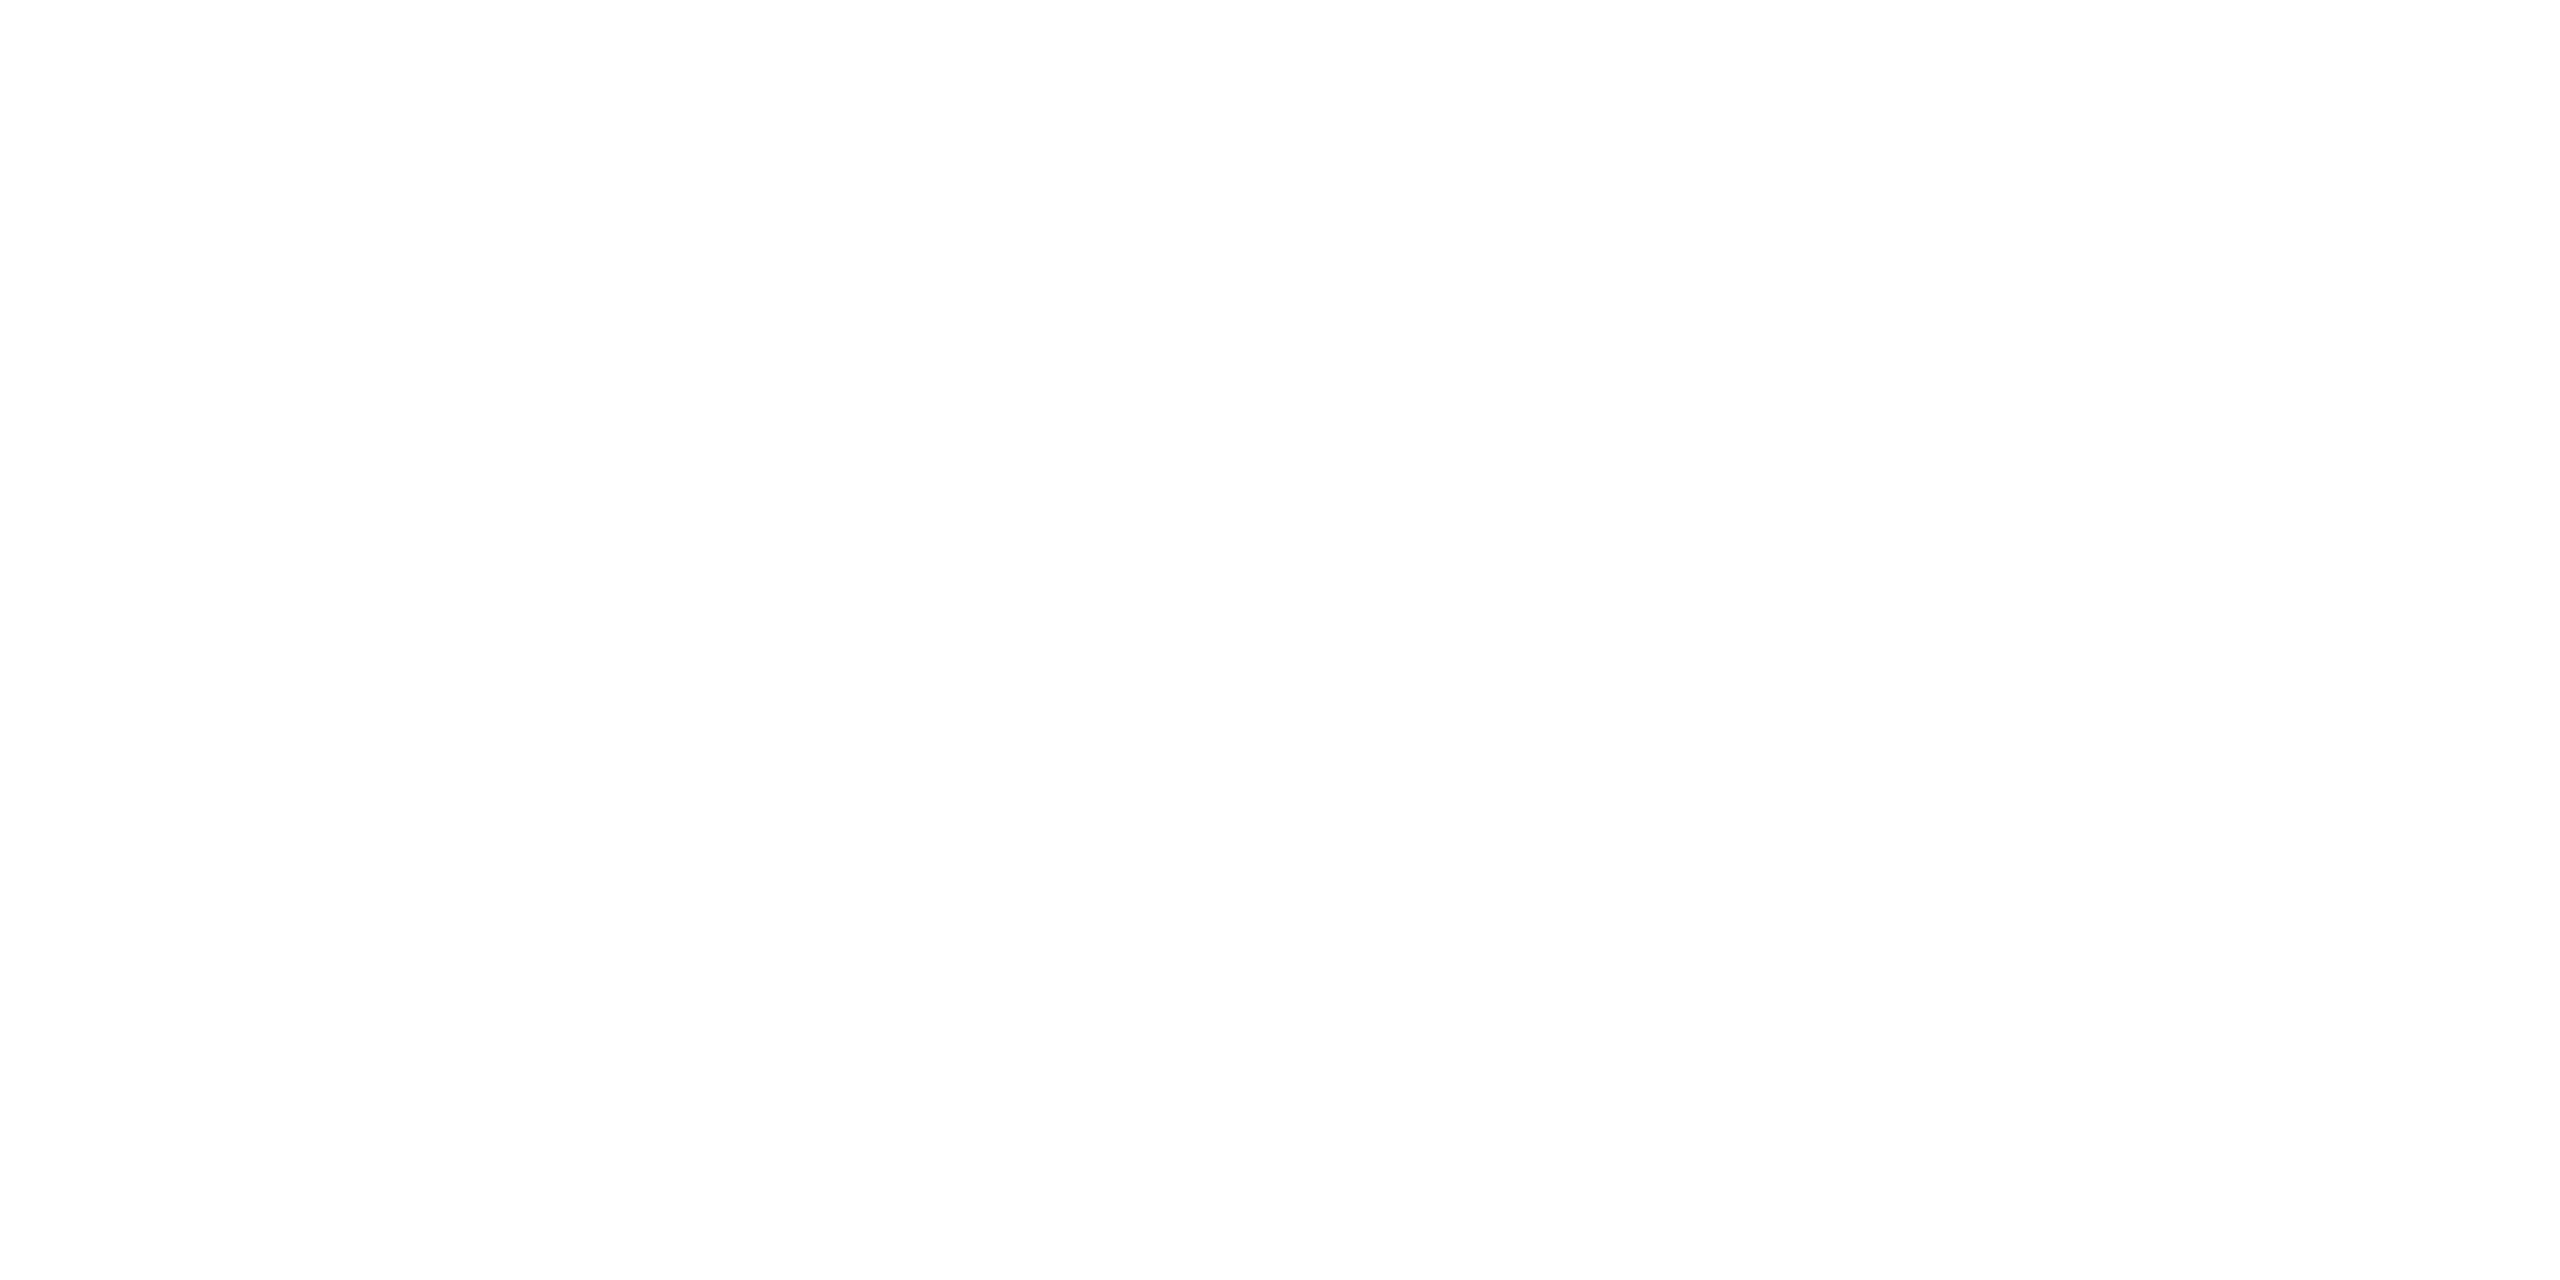

In [33]:
%matplotlib notebook

fig, ax = plt.subplots(1,2,subplot_kw={'projection': '3d'}, figsize=(16,8), 
                       sharex=True, sharey=True
                      )

f_t = np.zeros(x_t.shape)

for j in range(100):
    f_t[j,:-1,:]=yhat[j*(len(t)-1):(j+1)*(len(t)-1),:]
    
    x, y, z = f_t[j,:,:].T
    ax[0].plot(x, y, z,linewidth=1)
    ax[0].scatter(x0[j,0],x0[j,1],x0[j,2],color='r')    

    x, y, z = x_t[j,:,:].T
    ax[1].plot(x, y, z,linewidth=1)
    ax[1].scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax[0].view_init(18, -113)
ax[1].view_init(18, -113)
plt.show()

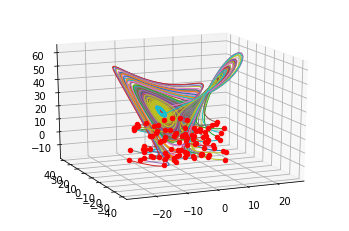

In [34]:
%matplotlib inline
np.random.seed(123)
x0 = -15 + 30 * np.random.random((100, 3))
x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t, (sigma, beta, rho))
                  for x0_j in x0])

fig, ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})

for j in range(100):
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

#### Start with a new seed and new initial conditions

In [35]:
x_t[j,:,:].T.shape

(3, 801)

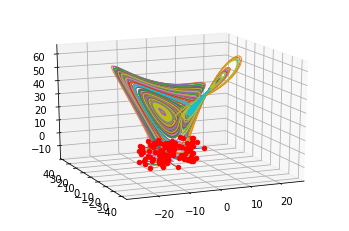

In [36]:
np.random.seed(53)
x0 = -15 + 20 * np.random.random((100, 3))
x_t = np.asarray([integrate.odeint(lorenz_deriv, x0_j, t, (sigma, beta, rho))
                  for x0_j in x0])

fig, ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})

for j in range(100):
    x, y, z = x_t[j,:,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()

#### Make predictions

In [37]:
# Set up array of zeros for neural network predictions
ynn = np.zeros((len(t), x0.shape[0], x0.shape[1]))

# Give initial starting conditions
ynn[0, :, :] = x0
print(ynn.shape)

(801, 100, 3)


In [38]:
# Run through timesteps
for j in range(1, len(t)):
    if j == 1:
        # Predict values with given conditions
        y0=model.predict(x0)
    else:
        y0=model.predict(f0)
    
    # Add this into the neural network prediction array
    ynn[j, :, :]=y0
    
    # update starting conditions with network predictions
    f0=y0

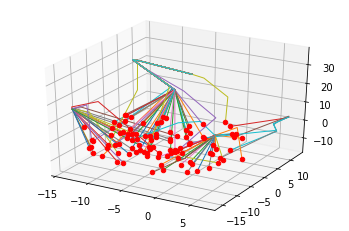

In [39]:
fig, ax = plt.subplots(1,1, subplot_kw={'projection': '3d'})
for j in range(100):
    x, y, z = ynn[:,j,:].T
    ax.plot(x, y, z,linewidth=1)
    ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')             
# ax.view_init(18, -113)
plt.show()    

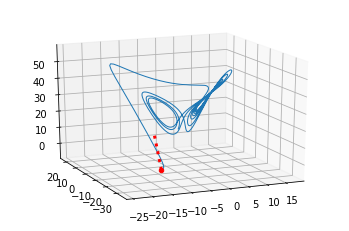

In [40]:
# Check out the trajectory of a single point
j=15
fig, ax = plt.subplots(1,1,subplot_kw={'projection': '3d'})
x, y, z = x_t[j,:,:].T
ax.plot(x, y, z,linewidth=1)

x, y, z = ynn[:,j,:].T
ax.plot(x, y, z,linewidth=3, linestyle=":", color='red')
ax.scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax.view_init(18, -113)
plt.show()    

## Predictions look pretty bad.  Try another quick test

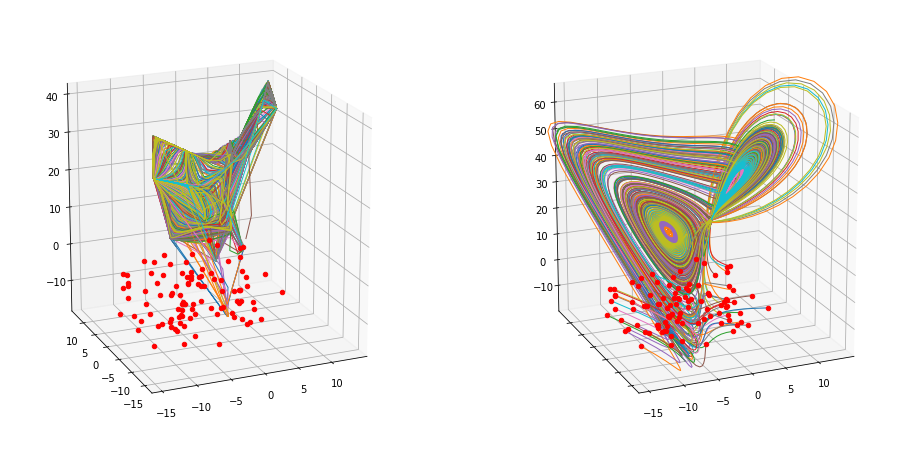

In [41]:
fig, ax = plt.subplots(1,2,subplot_kw={'projection': '3d'}, figsize=(16,8), 
                       sharex=True, sharey=True
                      )

f_t = np.zeros(x_t.shape)

for j in range(100):
    f_t[j,:-1,:]=yhat[j*(len(t)-1):(j+1)*(len(t)-1),:]
    
    x, y, z = f_t[j,:,:].T
    ax[0].plot(x, y, z,linewidth=1)
    ax[0].scatter(x0[j,0],x0[j,1],x0[j,2],color='r')    

    x, y, z = x_t[j,:,:].T
    ax[1].plot(x, y, z,linewidth=1)
    ax[1].scatter(x0[j,0],x0[j,1],x0[j,2],color='r')
             
ax[0].view_init(18, -113)
ax[1].view_init(18, -113)
plt.show()